In [3]:
# Wine Classification using Support Vector Machine (SVM)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
class_names = wine.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [8]:
# Create SVM Classifier
svm = SVC(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Make predictions
y_pred = best_svm.predict(X_test_scaled)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}



--- SVM Classifier Performance ---
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815
F1 Score: 0.9816


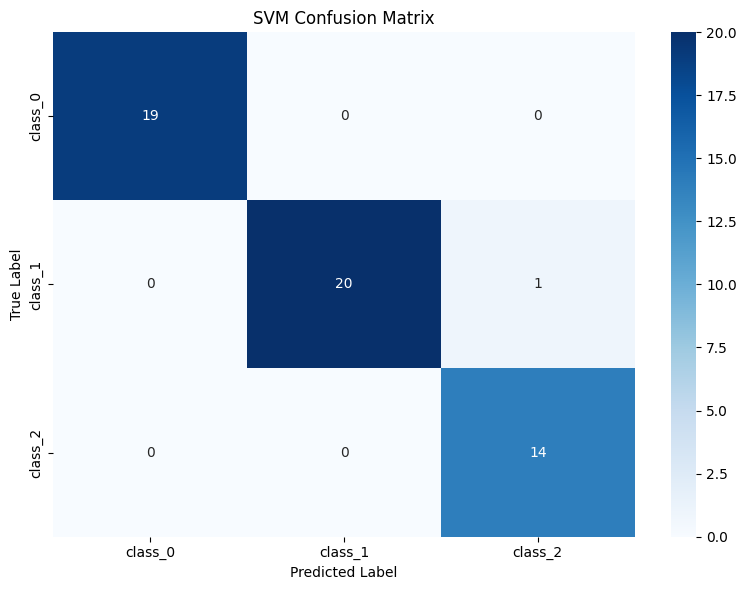


Detailed Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


SVM Wine Classification Analysis Complete!


In [9]:
# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
print("\n--- SVM Classifier Performance ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

print("\nSVM Wine Classification Analysis Complete!")